In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd

import io

dataset = pd.read_csv('/content/drive/MyDrive/Data.csv')

In [4]:
dataset.head()

,SeverMachine
0,0.075269
1,0.086022
2,0.075269
3,0.086022
4,0.086022


In [5]:
model=IsolationForest(n_estimators=50, max_samples=200, contamination=float(0.1),max_features=1.0)
model.fit(dataset[['SeverMachine']])

IsolationForest(behaviour='deprecated', bootstrap=False, contamination=0.1,
                max_features=1.0, max_samples=200, n_estimators=50, n_jobs=None,
                random_state=None, verbose=0, warm_start=False)

In [6]:
dataset['scores']=model.decision_function(dataset[['SeverMachine']])
dataset['anomaly']=model.predict(dataset[['SeverMachine']])
dataset.head(20)

,SeverMachine,scores,anomaly
0,0.075269,0.131254,1
1,0.086022,0.151095,1
2,0.075269,0.131254,1
3,0.086022,0.151095,1
4,0.086022,0.151095,1
5,0.086022,0.151095,1
6,0.086022,0.151095,1
7,0.086022,0.151095,1
8,0.086022,0.151095,1
9,0.086022,0.151095,1


In [7]:
dataset["anomaly"].replace({1:0,-1:1},inplace=True)

In [8]:
import pandas as pd

import io

dataset1 = pd.read_csv('/content/drive/MyDrive/Data1.csv')

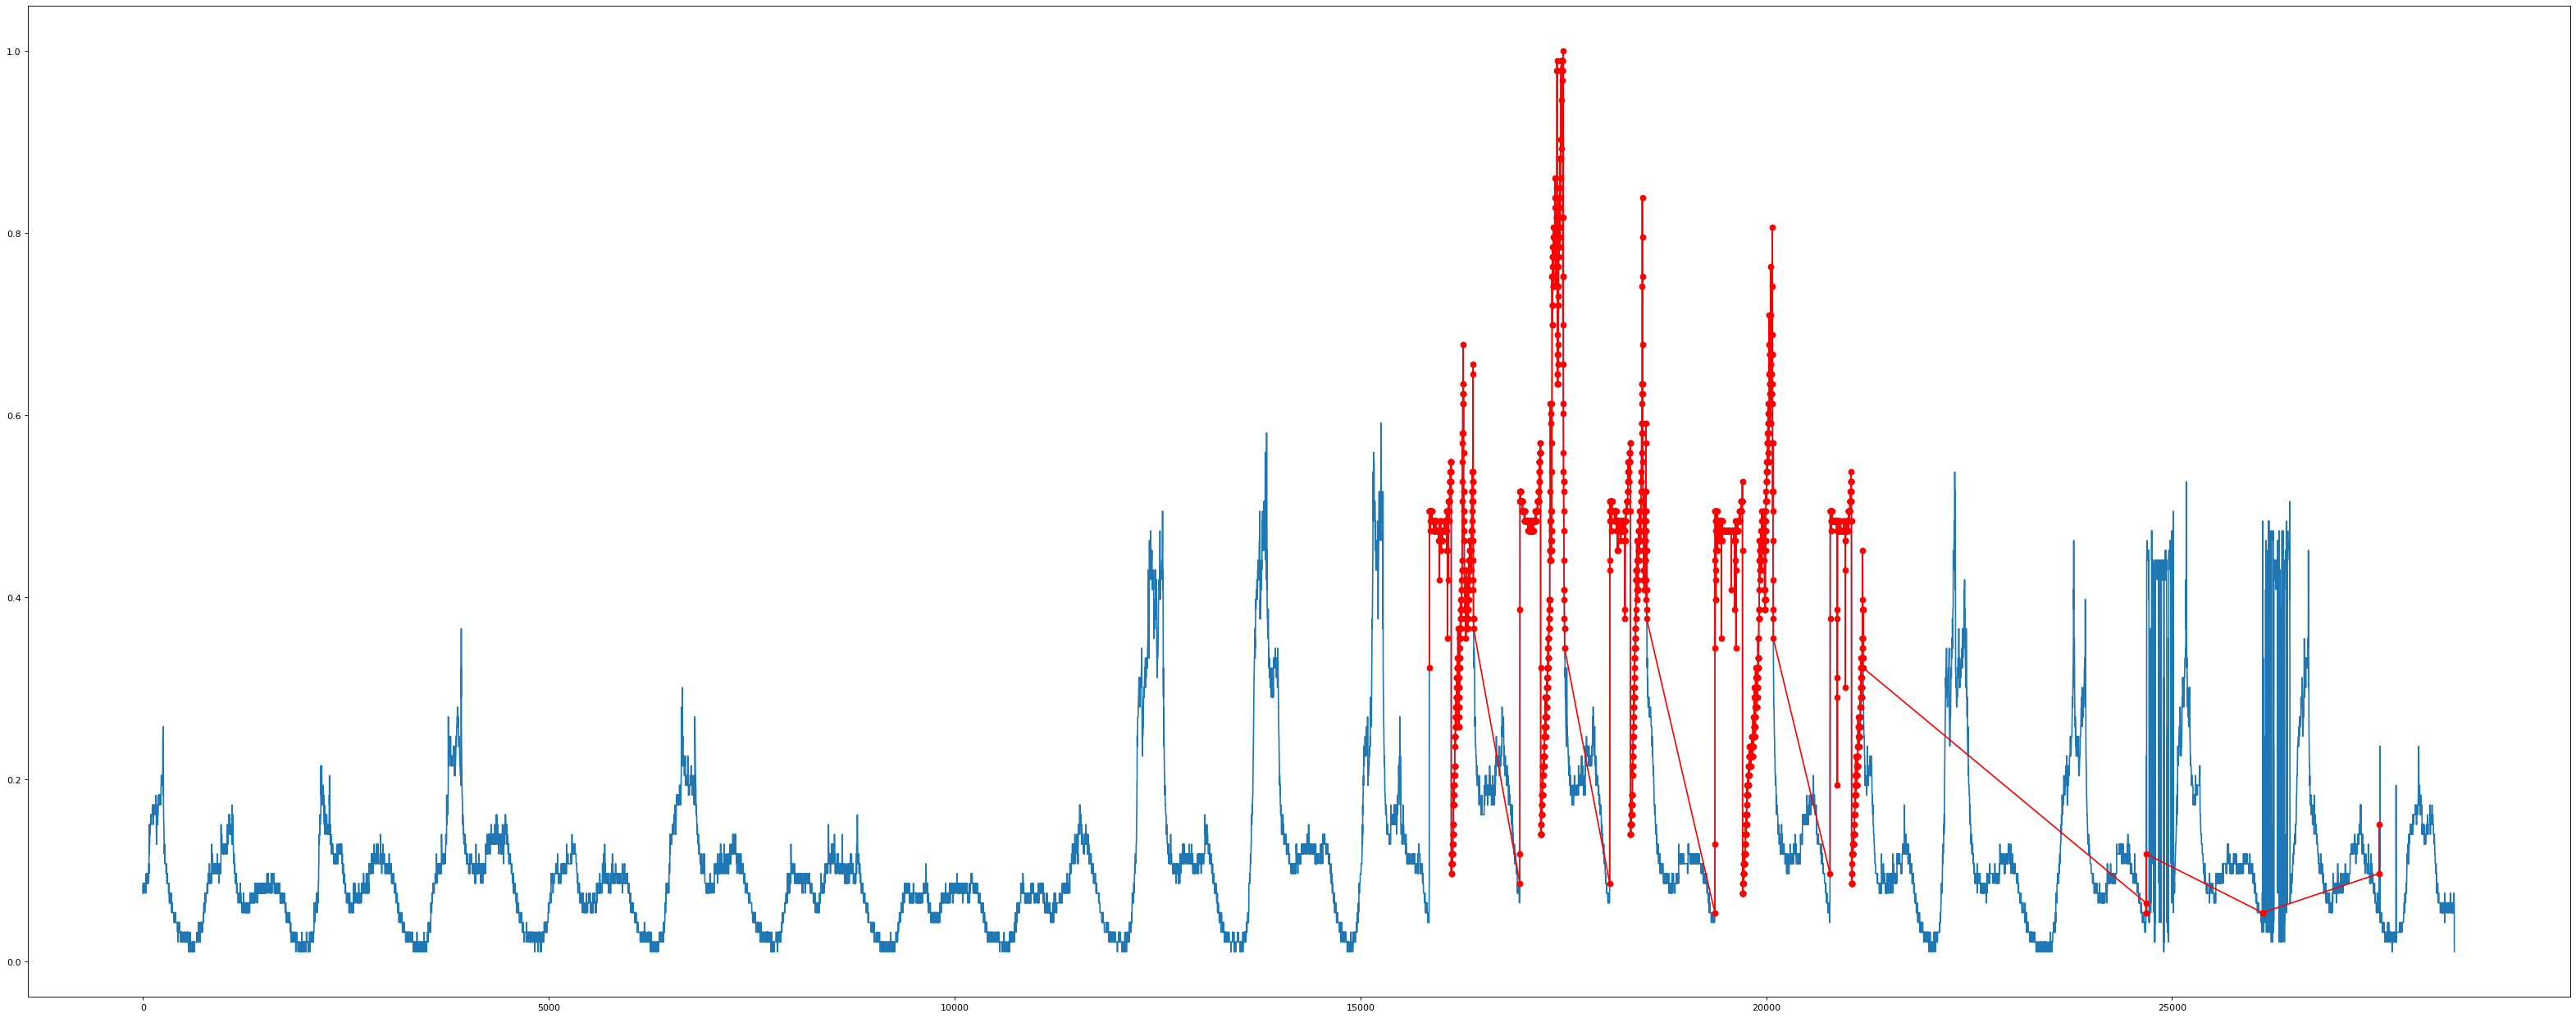

In [16]:
fig, ax = plt.subplots(num=None, figsize=(50,20), dpi=80, facecolor='w', edgecolor='k')



ax.plot(dataset1.reset_index().SeverMachine)

ax.plot(dataset1[dataset1.label == 1].SeverMachine, 'r', marker="o")

In [17]:
dataset.head()

,SeverMachine,scores,anomaly
0,0.075269,0.131254,0
1,0.086022,0.151095,0
2,0.075269,0.131254,0
3,0.086022,0.151095,0
4,0.086022,0.151095,0


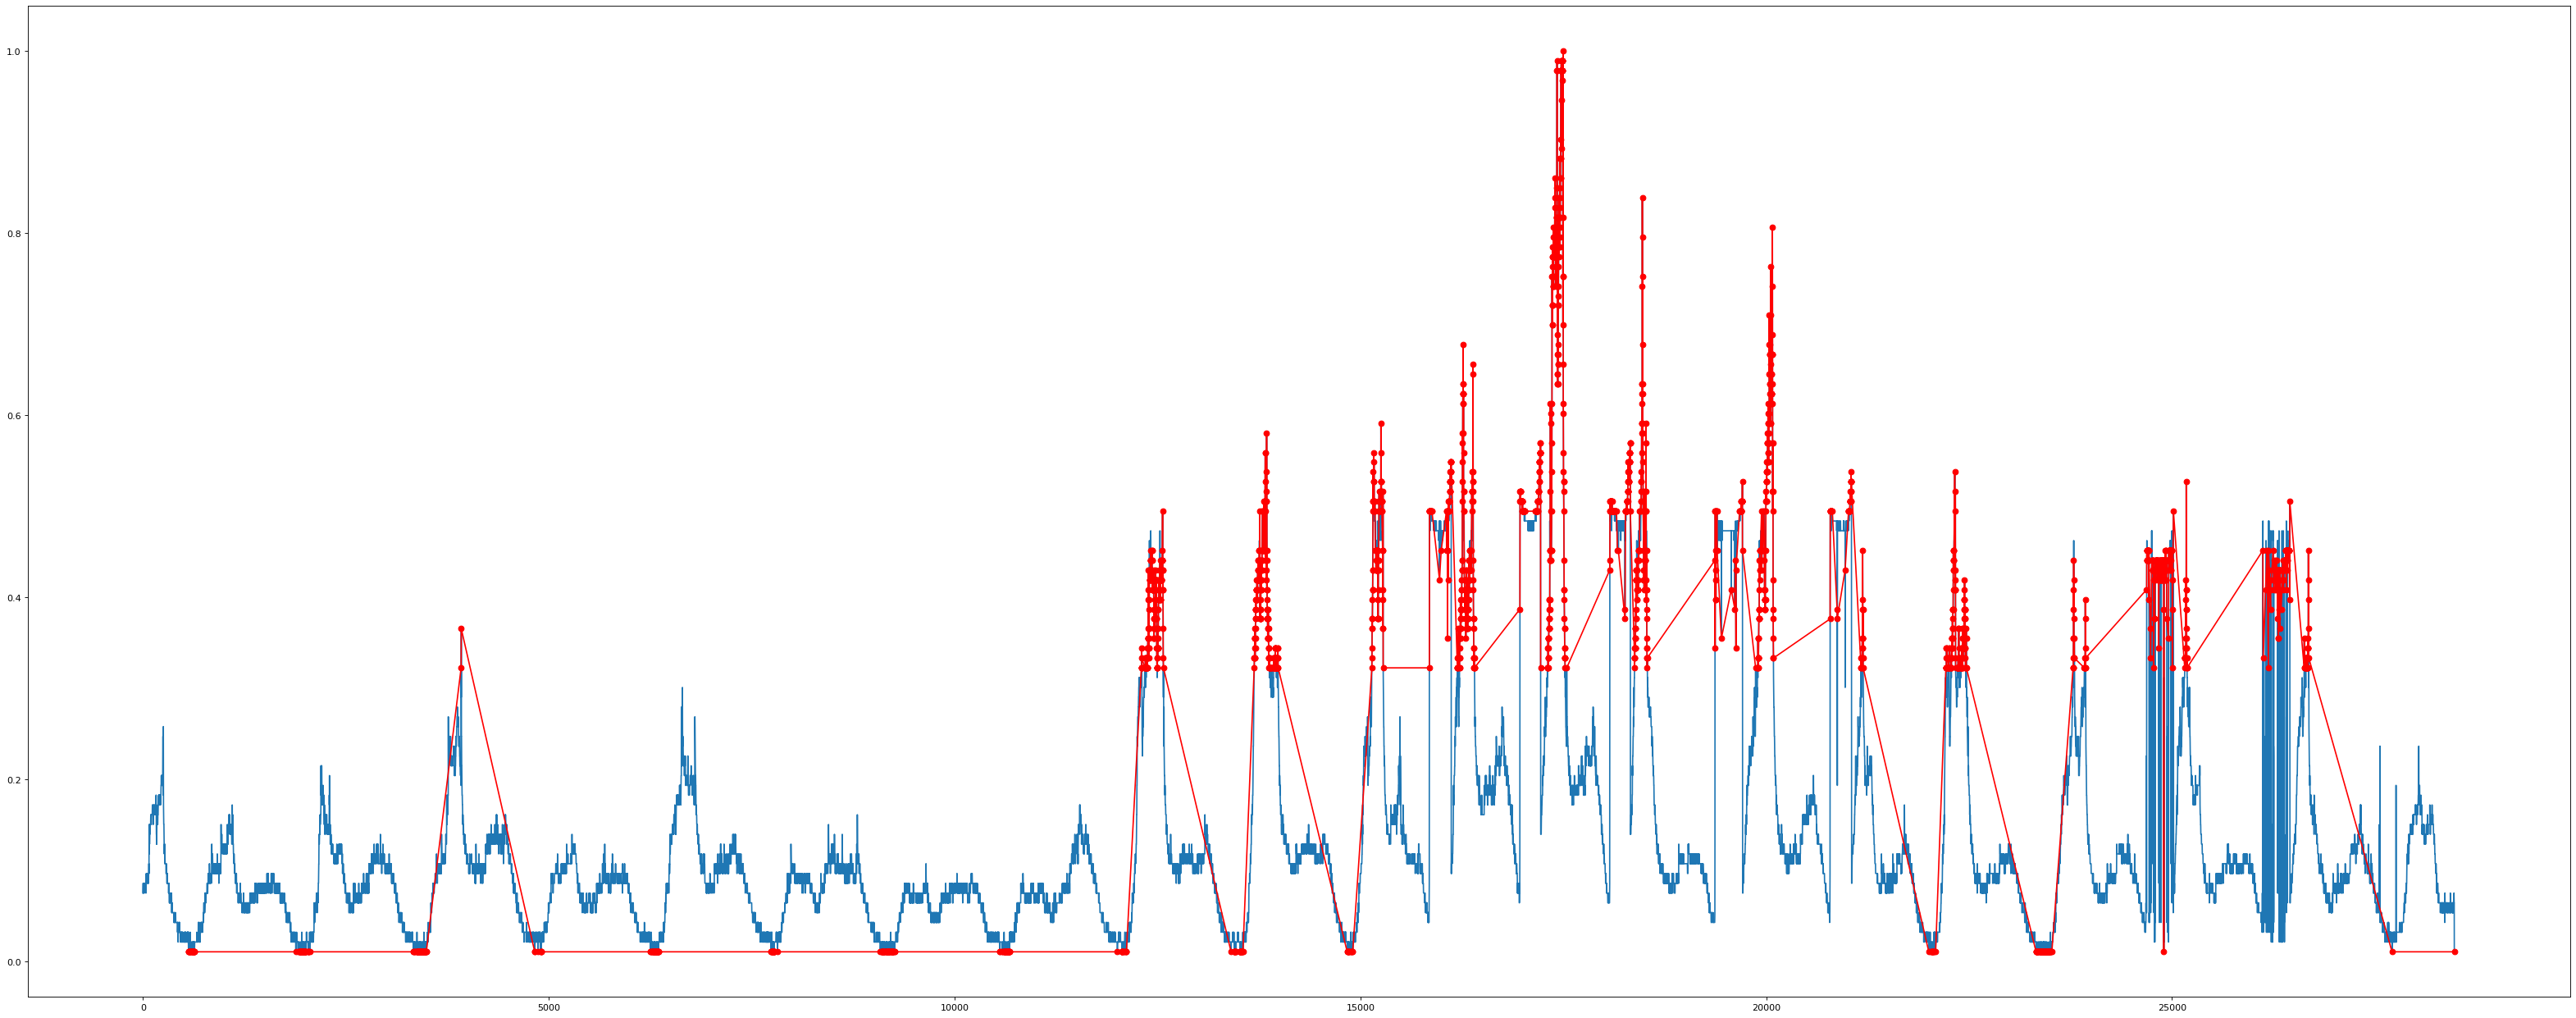

In [18]:
fig, ax = plt.subplots(num=None, figsize=(50,20), dpi=80, facecolor='w', edgecolor='k')



ax.plot(dataset.reset_index().SeverMachine)

ax.plot(dataset[dataset.anomaly == 1].SeverMachine, 'r', marker="o")

In [9]:
dataset1.head()


,SeverMachine,label
0,0.075269,0
1,0.086022,0
2,0.075269,0
3,0.086022,0
4,0.086022,0


In [19]:
dataset1

,SeverMachine,label
0,0.075269,0
1,0.086022,0
2,0.075269,0
3,0.086022,0
4,0.086022,0
...,...,...
28474,0.075269,0
28475,0.064516,0
28476,0.064516,0
28477,0.064516,0


In [20]:
anomaly1=dataset1.loc[dataset1['label']==1]
anomaly1_index=list(anomaly.index)
print(anomaly1)

       SeverMachine  label
15849      0.322581      1
15850      0.494624      1
15851      0.494624      1
15852      0.494624      1
15853      0.494624      1
...             ...    ...
24681      0.118280      1
26114      0.053763      1
26115      0.053763      1
27554      0.096774      1
27555      0.150538      1

[2694 rows x 2 columns]


In [10]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(dataset['anomaly'],dataset1['label']))
print(classification_report(dataset['anomaly'],dataset1['label']))

[[24145  1612]
 [ 1640  1082]]
              precision    recall  f1-score   support

           0       0.94      0.94      0.94     25757
           1       0.40      0.40      0.40      2722

    accuracy                           0.89     28479
   macro avg       0.67      0.67      0.67     28479
weighted avg       0.89      0.89      0.89     28479



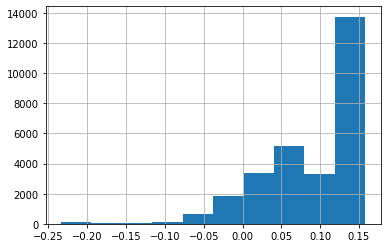

In [11]:
dataset['scores'].hist()

In [12]:
def iqr_bounds(scores,k=1.5):
    q1 = scores.quantile(0.25)
    q3 = scores.quantile(0.75)
    iqr = q3 - q1
    lower_bound=(q1 - k * iqr)
    upper_bound=(q3 + k * iqr)
    print("Lower bound:{} \nUpper bound:{}".format(lower_bound,upper_bound))
    return lower_bound,upper_bound
lower_bound,upper_bound=iqr_bounds(dataset['scores'],k=2)


Lower bound:-0.14762181145900843 
Upper bound:0.35023889337350417


In [13]:
anomaly=dataset.loc[dataset['anomaly']==1]
anomaly_index=list(anomaly.index)
print(anomaly)

       SeverMachine    scores  anomaly
560        0.010753 -0.053165        1
561        0.010753 -0.053165        1
563        0.010753 -0.053165        1
572        0.010753 -0.053165        1
574        0.010753 -0.053165        1
...             ...       ...      ...
26681      0.419355 -0.033594        1
26682      0.365591 -0.022755        1
26685      0.333333 -0.004233        1
27711      0.010753 -0.053165        1
28478      0.010753 -0.053165        1

[2722 rows x 3 columns]


In [14]:
print(dataset['anomaly'].value_counts())

0    25757
1     2722
Name: anomaly, dtype: int64


In [15]:
print("Percentage of anomalies in data: {:.2f}".format((len(dataset.loc[dataset['anomaly']==1])/len(dataset))*100))

Percentage of anomalies in data: 9.56
